In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import shuffle
from scipy.integrate import ode, odeint
from scipy.sparse import csgraph
from scipy.signal import find_peaks
from scipy.spatial import distance
from scipy.stats import norm
from scipy.interpolate import interp1d
from matplotlib.pylab import rcParams
from matplotlib import animation
import pickle
from IPython.display import HTML

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 6
rcParams['animation.html'] = 'html5'

In [6]:
def phaseInterpol(x):
    peaks, _ = find_peaks(x,height=0.5,distance=10)
    Ts =np.diff(peaks)
    head =np.linspace(0,2*np.pi,num= Ts[0])[-peaks[0]-1:-1]
    phase = np.concatenate([np.linspace(0,2*np.pi,num=Tn+1)[:-1] for Tn in Ts])
    if peaks[0] != 0:
        phase = np.concatenate((head,phase ))
    while len(phase) < len(x):
        phase = np.concatenate((phase, np.linspace(0,2*np.pi,num=Ts[-1]) ))[:len(x)]
    return phase

In [7]:
def order_param(theta, N, k=1):
    """Returns kth order parameter
    """
    Rk = np.sum( np.exp(1j * k * theta.reshape(-1,N)), axis=1 )/N
    return np.abs(Rk), np.angle(Rk)

In [3]:
np.random.seed(3) 
mean_w = 0.75                            #mean of distribution of natural frequencies of oscillators
std_w = 0.05                           #standard deviation of disribution of natural freqs
N=500
K = None #will loop over this          #coupling strength
sample = np.random.normal(mean_w, std_w, N)
g0= norm.pdf(0,0,std_w)
Kc=2/(np.pi*g0)
t_end_o = 200
dt = 0.1
resolution = 2000
print(Kc)

0.07978845608028654


In [2]:
with open('./data/Hist_OP_alpha0.050_x_t200.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    Hist_OP005 = pickle.load(f)
alpha005 = 0.05

In [3]:
with open('./data/OPTrack_alpha0.050_x_t200.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    OPTrack005 = pickle.load(f)

In [4]:
with open('./data/Hist_OP_alpha1.000_x_t200.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    Hist_OP1 = pickle.load(f)
alpha1 = 1

In [5]:
with open('./data/OPTrack_alpha1.000_x_t200.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    OPTrack1 = pickle.load(f)

In [6]:
with open('./data/Hist_OP_alpha1.500_x_t200.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    Hist_OP15 = pickle.load(f)
alpha15 = 1.5

In [7]:
with open('./data/OPTrack_alpha1.500_x_t200.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    OPTrack15 = pickle.load(f)

In [10]:
with open('./data/Hist_OP_alpha5.000_x_t200.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    Hist_OP5 = pickle.load(f)
alpha5 = 5

In [11]:
with open('./data/OPTrack_alpha5.000_x_t200.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    OPTrack5 = pickle.load(f)

In [12]:
with open('./data/Hist_OP_alpha7.000_x_t200.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    Hist_OP7 = pickle.load(f)
alpha7 = 7

In [13]:
with open('./data/OPTrack_alpha7.000_x_t200.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    OPTrack7 = pickle.load(f)

In [14]:
with open('./data/Hist_OP_alpha15.000_x_t200.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    Hist_OP150 = pickle.load(f)
alpha150 = 15

In [15]:
with open('./data/OPTrack_alpha15.000_x_t200.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    OPTrack150 = pickle.load(f)

In [16]:
with open('./data/OPTrack_alpha1.500_x_t600.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    OPTrack15t600 = pickle.load(f)

In [17]:
with open('./data/OPTrack_alpha3.000_x_t600.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    OPTrack3t600 = pickle.load(f)

In [18]:
with open('./data/OPTrack_alpha15.000_x_t600.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    OPTrack150t600 = pickle.load(f)

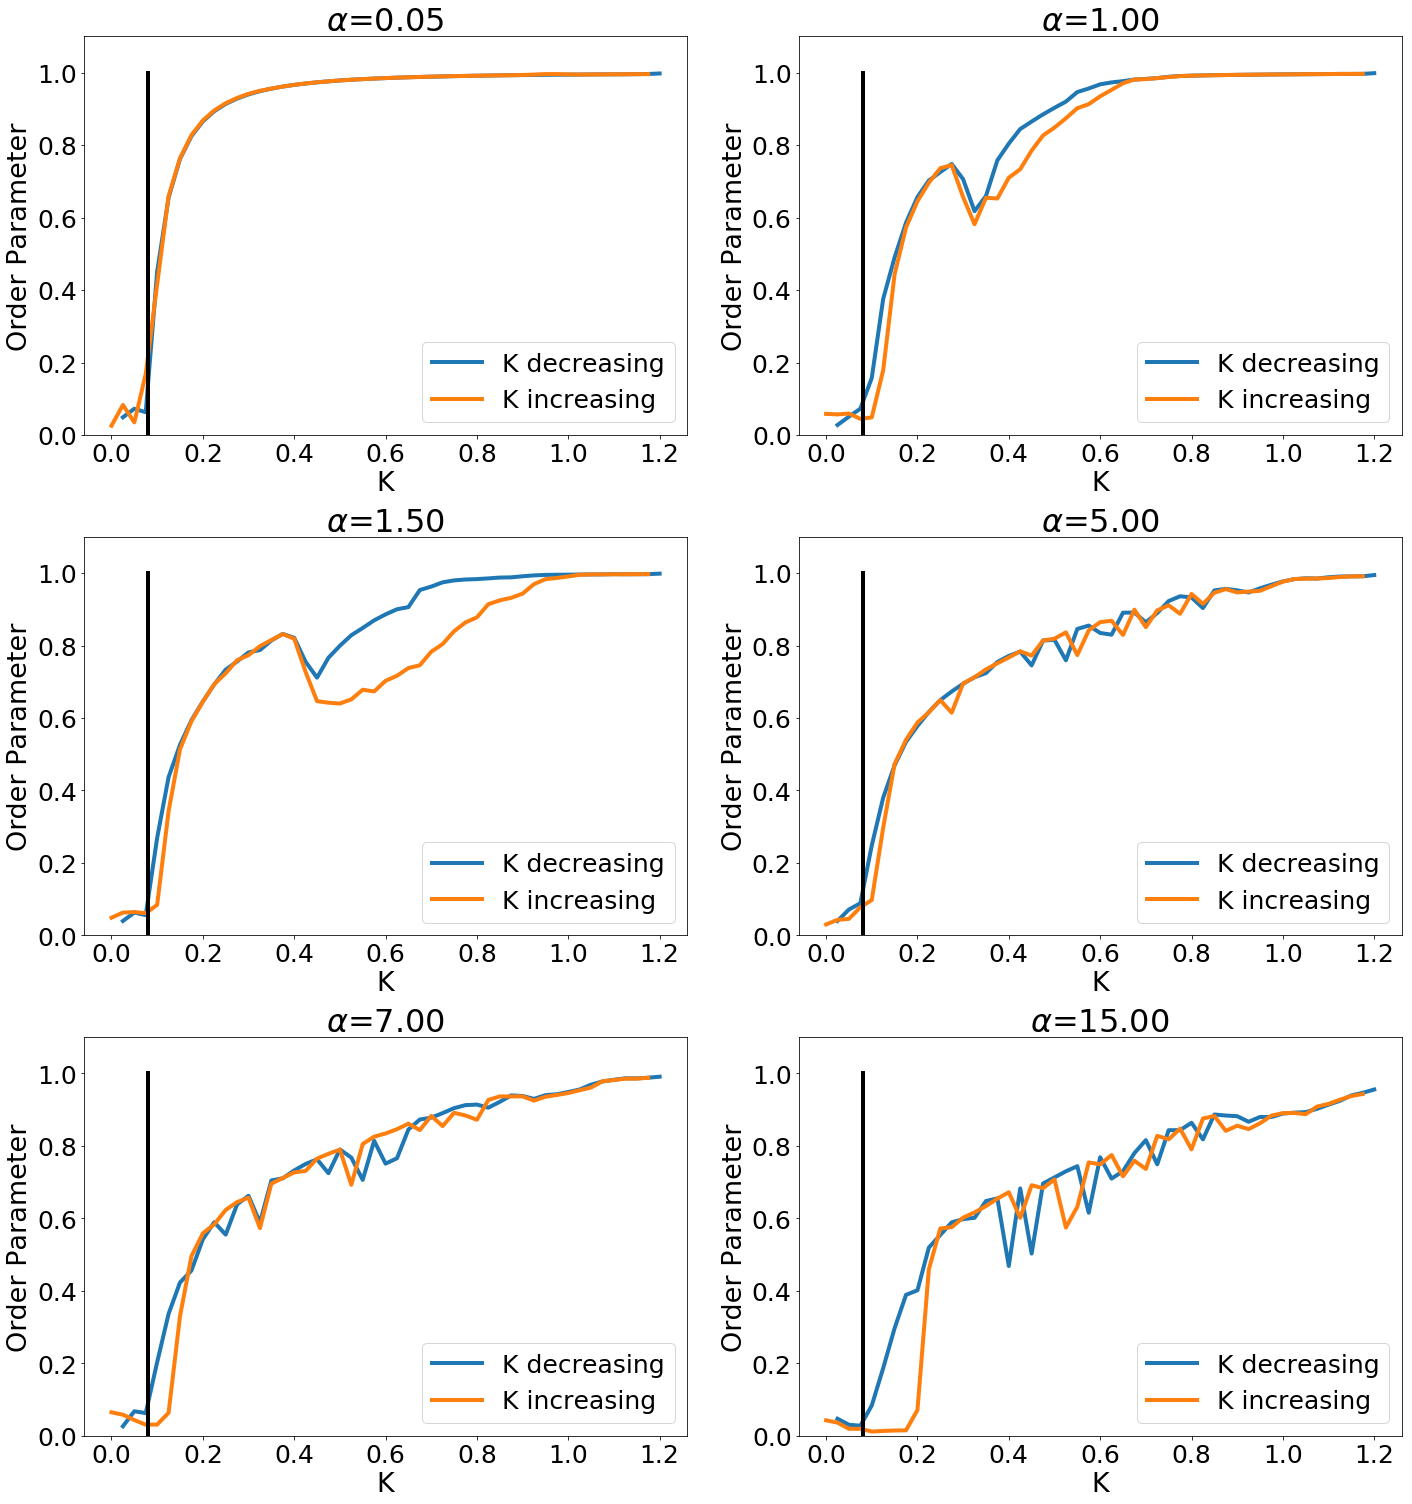

In [31]:
rcParams['figure.figsize'] = 20, 21
ticksize = 25
titelsize = 32
labelsize =27
legendsize = 25
linewidth = 4

plt.subplot(3,2,1)
Hist_OP = Hist_OP005
plt.plot(Hist_OP[:48,0],Hist_OP[:48,1],label="K decreasing", linewidth=linewidth)
plt.plot(Hist_OP[48:,0],Hist_OP[48:,1],label="K increasing", linewidth=linewidth)
plt.xlabel('K',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha005),fontsize=titelsize)
plt.ylim([0,1.1])
plt.legend(fontsize=legendsize)
plt.plot((Kc,Kc),(0,1),'k-', linewidth=linewidth)
plt.tick_params(axis='both', which='major', labelsize=ticksize)



plt.subplot(3,2,2)

Hist_OP = Hist_OP1
plt.plot(Hist_OP[:48,0],Hist_OP[:48,1],label="K decreasing", linewidth=linewidth)
plt.plot(Hist_OP[48:,0],Hist_OP[48:,1],label="K increasing", linewidth=linewidth)
plt.xlabel('K',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha1),fontsize=titelsize)
plt.ylim([0,1.1])
plt.legend(fontsize=legendsize)
plt.plot((Kc,Kc),(0,1),'k-', linewidth=linewidth)
plt.tick_params(axis='both', which='major', labelsize=ticksize)


plt.subplot(3,2,3)

Hist_OP = Hist_OP15
plt.plot(Hist_OP[:48,0],Hist_OP[:48,1],label="K decreasing", linewidth=linewidth)
plt.plot(Hist_OP[48:,0],Hist_OP[48:,1],label="K increasing", linewidth=linewidth)
plt.xlabel('K',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha15),fontsize=titelsize)
plt.ylim([0,1.1])
plt.legend(fontsize=legendsize)
plt.plot((Kc,Kc),(0,1),'k-', linewidth=linewidth)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(3,2,4)

Hist_OP = Hist_OP5
plt.plot(Hist_OP[:48,0],Hist_OP[:48,1],label="K decreasing", linewidth=linewidth)
plt.plot(Hist_OP[48:,0],Hist_OP[48:,1],label="K increasing", linewidth=linewidth)
plt.xlabel('K',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha5),fontsize=titelsize)
plt.ylim([0,1.1])
plt.legend(fontsize=legendsize)
plt.plot((Kc,Kc),(0,1),'k-', linewidth=linewidth)
plt.tick_params(axis='both', which='major', labelsize=ticksize)


plt.subplot(3,2,5)

Hist_OP = Hist_OP7
plt.plot(Hist_OP[:48,0],Hist_OP[:48,1],label="K decreasing", linewidth=linewidth)
plt.plot(Hist_OP[48:,0],Hist_OP[48:,1],label="K increasing", linewidth=linewidth)
plt.xlabel('K',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha7),fontsize=titelsize)
plt.ylim([0,1.1])
plt.legend(fontsize=legendsize)
plt.plot((Kc,Kc),(0,1),'k-', linewidth=linewidth)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(3,2,6)

Hist_OP = Hist_OP150
plt.plot(Hist_OP[:48,0],Hist_OP[:48,1],label="K decreasing", linewidth=linewidth)
plt.plot(Hist_OP[48:,0],Hist_OP[48:,1],label="K increasing", linewidth=linewidth)
plt.xlabel('K',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha150),fontsize=titelsize)
plt.ylim([0,1.1])
plt.legend(fontsize=legendsize)
plt.plot((Kc,Kc),(0,1),'k-', linewidth=linewidth)
plt.tick_params(axis='both', which='major', labelsize=ticksize)


plt.tight_layout()

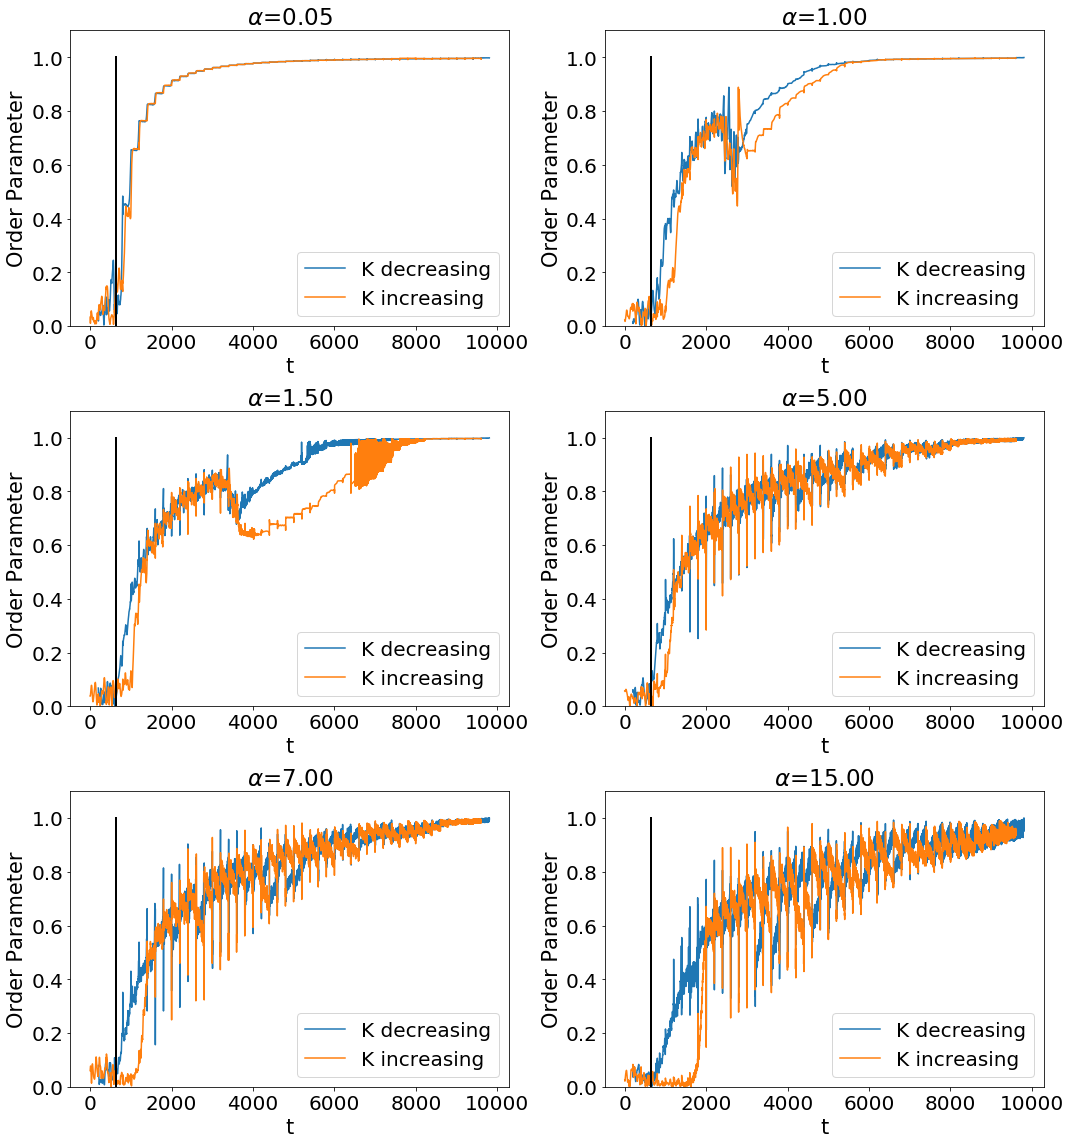

In [37]:
rcParams['figure.figsize'] = 15,16
ticksize = 20
titelsize = 23
labelsize =21
legendsize = 20
linewidth=2


plt.subplot(3,2,1)

OPTrackl = np.split(OPTrack005,2)
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
plt.plot(np.arange(oneK,oneK+totalT,1)*dt,OPTrackl[0][::-1],label="K decreasing")
plt.plot(np.arange(totalT)*dt,OPTrackl[1],label="K increasing")
plt.xlabel('t',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha005),fontsize=titelsize)
plt.legend(fontsize=legendsize)
plt.ylim([0,1.1])
plt.plot((Kc/0.025*(t_end_o+1),Kc/0.025*(t_end_o+1)),(0,1),'k-', linewidth=linewidth)
plt.tick_params(axis='both', which='major', labelsize=ticksize)



plt.subplot(3,2,2)
OPTrackl = np.split(OPTrack1,2)
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
plt.plot(np.arange(oneK,oneK+totalT,1)*dt,OPTrackl[0][::-1],label="K decreasing")
plt.plot(np.arange(totalT)*dt,OPTrackl[1],label="K increasing")
plt.xlabel('t',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha1),fontsize=titelsize)
plt.legend(fontsize=legendsize)
plt.ylim([0,1.1])
plt.plot((Kc/0.025*(t_end_o+1),Kc/0.025*(t_end_o+1)),(0,1),'k-', linewidth=linewidth)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(3,2,3)
OPTrackl = np.split(OPTrack15,2)
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
plt.plot(np.arange(oneK,oneK+totalT,1)*dt,OPTrackl[0][::-1],label="K decreasing")
plt.plot(np.arange(totalT)*dt,OPTrackl[1],label="K increasing")
plt.xlabel('t',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha15),fontsize=titelsize)
plt.legend(fontsize=legendsize)
plt.ylim([0,1.1])
plt.plot((Kc/0.025*(t_end_o+1),Kc/0.025*(t_end_o+1)),(0,1),'k-', linewidth=linewidth)
plt.tick_params(axis='both', which='major', labelsize=ticksize)



plt.subplot(3,2,4)
OPTrackl = np.split(OPTrack5,2)
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
plt.ylim([0,1.1])
plt.plot(np.arange(oneK,oneK+totalT,1)*dt,OPTrackl[0][::-1],label="K decreasing")
plt.plot(np.arange(totalT)*dt,OPTrackl[1],label="K increasing")
plt.xlabel('t',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha5),fontsize=titelsize)
plt.legend(fontsize=legendsize)
plt.plot((Kc/0.025*(t_end_o+1),Kc/0.025*(t_end_o+1)),(0,1),'k-', linewidth=linewidth)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(3,2,5)
OPTrackl = np.split(OPTrack7,2)
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
plt.plot(np.arange(oneK,oneK+totalT,1)*dt,OPTrackl[0][::-1],label="K decreasing")
plt.plot(np.arange(totalT)*dt,OPTrackl[1],label="K increasing")
plt.xlabel('t',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha7),fontsize=titelsize)
plt.legend(fontsize=legendsize)
plt.ylim([0,1.1])
plt.plot((Kc/0.025*(t_end_o+1),Kc/0.025*(t_end_o+1)),(0,1),'k-', linewidth=linewidth)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(3,2,6)
OPTrackl = np.split(OPTrack150,2)
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
plt.plot(np.arange(oneK,oneK+totalT,1)*dt,OPTrackl[0][::-1],label="K decreasing")
plt.plot(np.arange(totalT)*dt,OPTrackl[1],label="K increasing")
plt.xlabel('t',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha150),fontsize=titelsize)
plt.legend(fontsize=legendsize)
plt.ylim([0,1.1])
plt.plot((Kc/0.025*(t_end_o+1),Kc/0.025*(t_end_o+1)),(0,1),'k-', linewidth=linewidth)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.tight_layout()


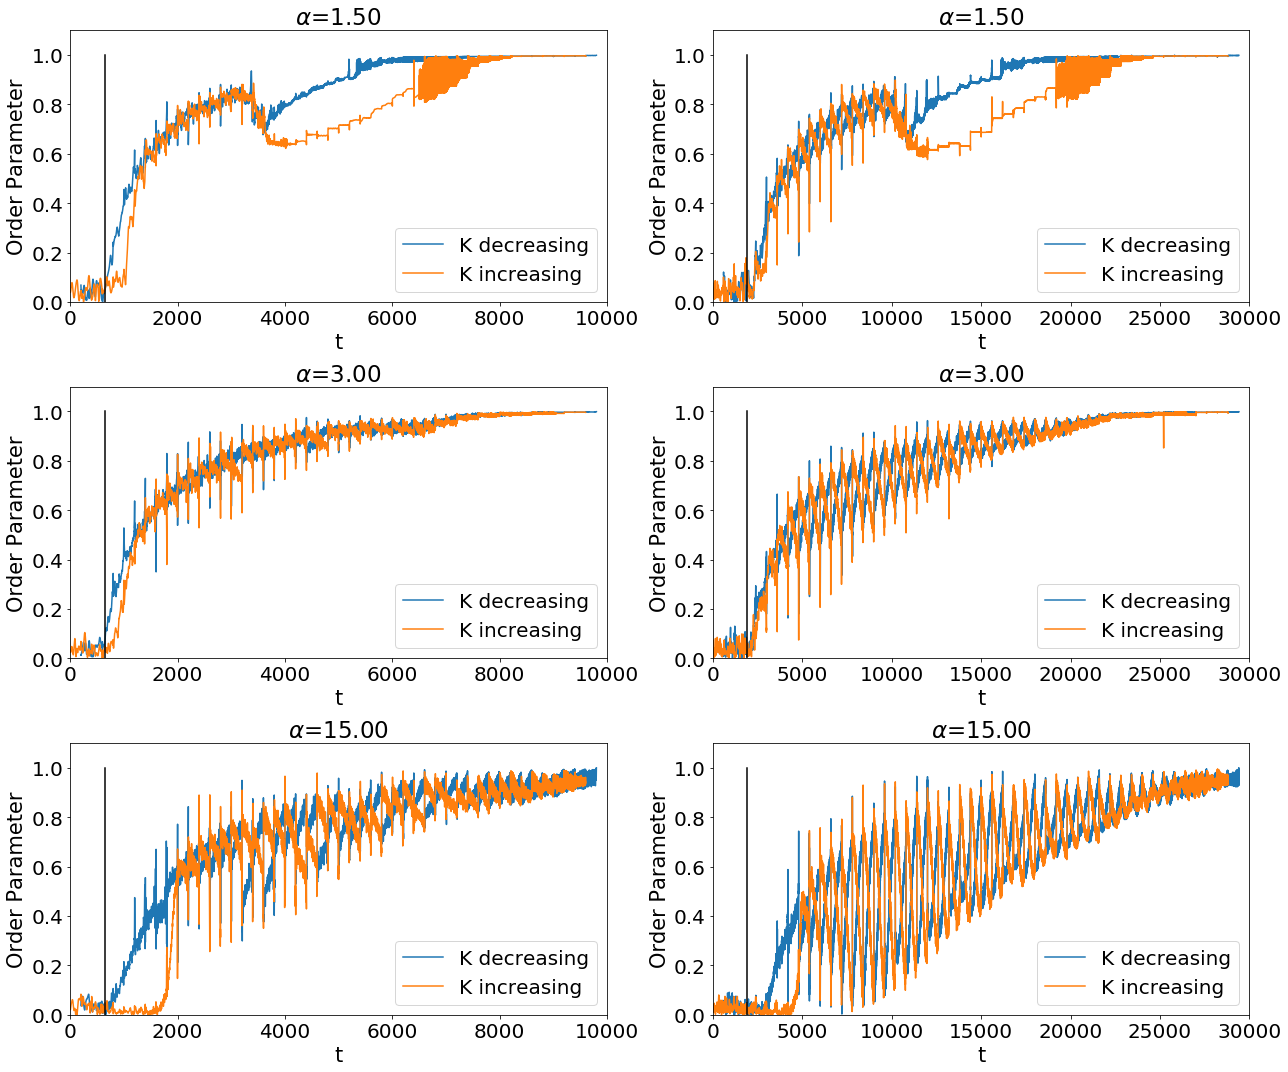

In [161]:
rcParams['figure.figsize'] = 18, 15
t_end_o = 200
ticksize = 20
titelsize = 23
labelsize =21
legendsize = 20
plt.subplot(3,2,1)

OPTrackl = np.split(OPTrack15,2)
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
plt.plot(np.arange(oneK,oneK+totalT,1)*dt,OPTrackl[0][::-1],label="K decreasing")
plt.plot(np.arange(totalT)*dt,OPTrackl[1],label="K increasing")
plt.xlabel('t',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha15),fontsize=titelsize)
plt.legend(fontsize=legendsize)
plt.xlim([0,10000])
plt.ylim([0,1.1])
plt.plot((Kc/0.025*(t_end_o+1),Kc/0.025*(t_end_o+1)),(0,1),'k-')
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(3,2,3)
OPTrackl = np.split(OPTrack3,2)
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
plt.xlim([0,10000])
plt.ylim([0,1.1])
plt.plot(np.arange(oneK,oneK+totalT,1)*dt,OPTrackl[0][::-1],label="K decreasing")
plt.plot(np.arange(totalT)*dt,OPTrackl[1],label="K increasing")
plt.xlabel('t',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha3),fontsize=titelsize)
plt.legend(fontsize=legendsize)
plt.plot((Kc/0.025*(t_end_o+1),Kc/0.025*(t_end_o+1)),(0,1),'k-')
plt.tick_params(axis='both', which='major', labelsize=ticksize)


plt.subplot(3,2,5)
OPTrackl = np.split(OPTrack150,2)
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
plt.plot(np.arange(oneK,oneK+totalT,1)*dt,OPTrackl[0][::-1],label="K decreasing")
plt.plot(np.arange(totalT)*dt,OPTrackl[1],label="K increasing")
plt.xlabel('t',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha150),fontsize=titelsize)
plt.legend(fontsize=legendsize)
plt.xlim([0,10000])
plt.ylim([0,1.1])
plt.plot((Kc/0.025*(t_end_o+1),Kc/0.025*(t_end_o+1)),(0,1),'k-')
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.tight_layout()

# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
#                     wspace=0.35)
# plt.savefig('../img/OPalphaT0315.pdf')



t_end_o = 600
# rcParams['figure.figsize'] = 18, 15
# ticksize = 20
# titelsize = 23
# labelsize =21
# legendsize = 20
plt.subplot(3,2,2)

OPTrackl = np.split(OPTrack15t600.reshape((-1)),2)
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
plt.plot(np.arange(oneK,oneK+totalT,1)*dt,OPTrackl[0][::-1],label="K decreasing")
plt.plot(np.arange(totalT)*dt,OPTrackl[1],label="K increasing")
plt.xlabel('t',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha15),fontsize=titelsize)
plt.legend(fontsize=legendsize)
plt.xlim([0,30000])
plt.ylim([0,1.1])
plt.plot((Kc/0.025*(t_end_o+1),Kc/0.025*(t_end_o+1)),(0,1),'k-')
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(3,2,4)
OPTrackl = np.split(OPTrack3t600.reshape((-1)),2)
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
plt.xlim([0,30000])
plt.ylim([0,1.1])
plt.plot(np.arange(oneK,oneK+totalT,1)*dt,OPTrackl[0][::-1],label="K decreasing")
plt.plot(np.arange(totalT)*dt,OPTrackl[1],label="K increasing")
plt.xlabel('t',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha3),fontsize=titelsize)
plt.legend(fontsize=legendsize)
plt.plot((Kc/0.025*(t_end_o+1),Kc/0.025*(t_end_o+1)),(0,1),'k-')
plt.tick_params(axis='both', which='major', labelsize=ticksize)


plt.subplot(3,2,6)
OPTrackl = np.split(OPTrack150t600.reshape((-1)),2)
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
plt.plot(np.arange(oneK,oneK+totalT,1)*dt,OPTrackl[0][::-1],label="K decreasing")
plt.plot(np.arange(totalT)*dt,OPTrackl[1],label="K increasing")
plt.xlabel('t',fontsize=labelsize)
plt.ylabel('Order Parameter',fontsize=labelsize)
plt.title(r'$\alpha$=%2.2f'%(alpha150),fontsize=titelsize)
plt.legend(fontsize=legendsize)
plt.xlim([0,30000])
plt.ylim([0,1.1])
plt.plot((Kc/0.025*(t_end_o+1),Kc/0.025*(t_end_o+1)),(0,1),'k-')
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.tight_layout()

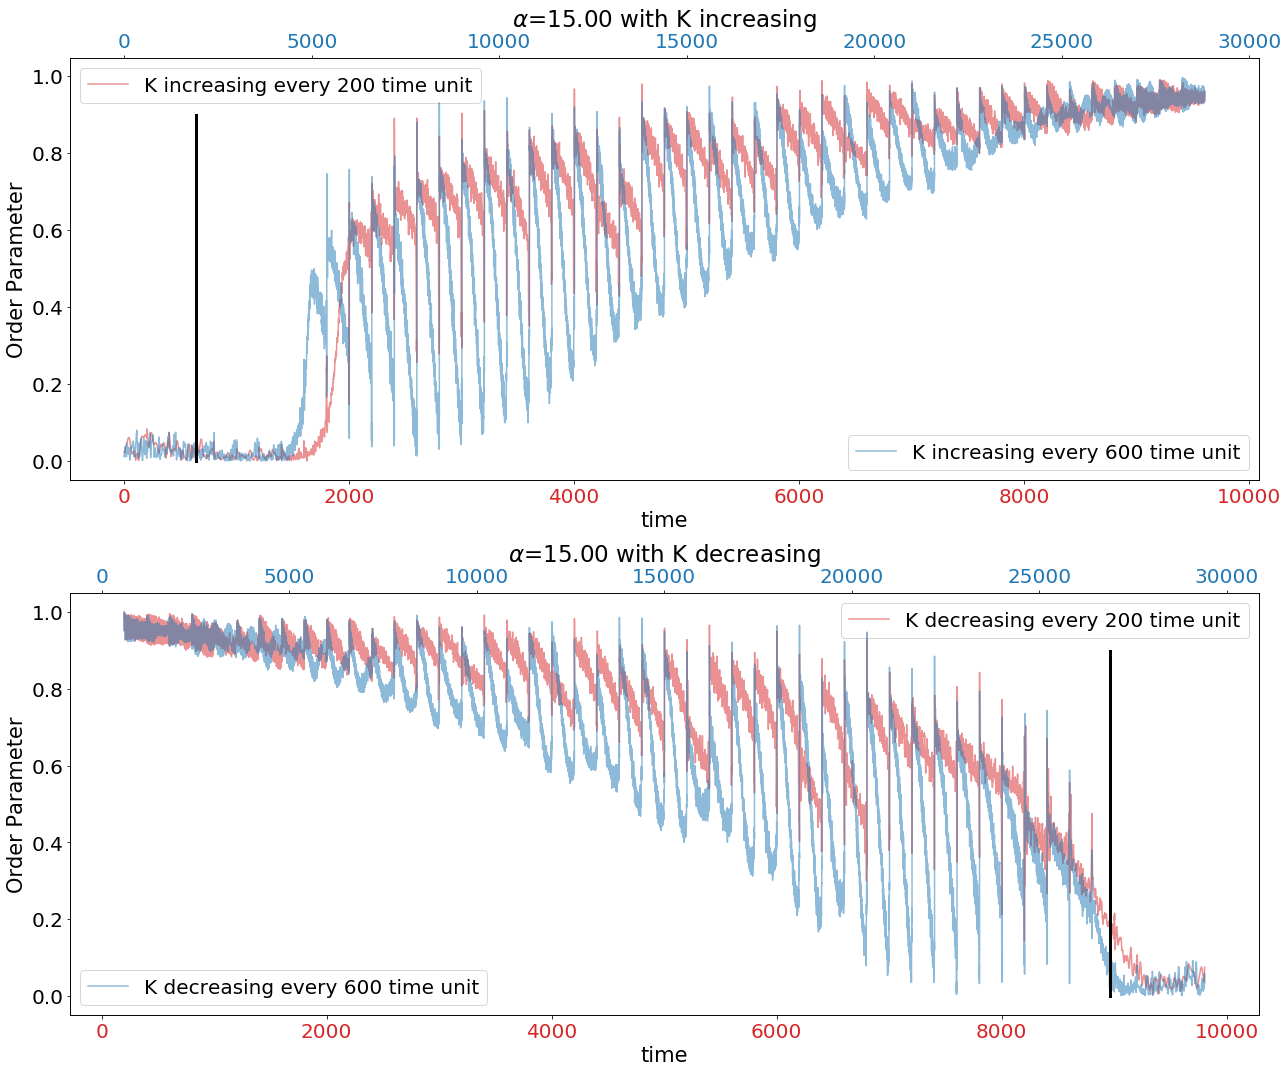

In [175]:
rcParams['figure.figsize'] = 18, 15
# Create some mock data
fig, (ax1,ax3) = plt.subplots(2)
OPTrackl = np.split(OPTrack150.reshape((-1)),2)
t_end_o = 200
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
color = 'tab:red'
ax1.set_xlabel('time',fontsize=labelsize)
ax1.set_ylabel('Order Parameter',fontsize=labelsize)
ax1.plot(np.arange(totalT)*dt,OPTrackl[1],label="K increasing every 200 time unit", alpha = 0.5, color=color)

ax1.tick_params(axis='x', labelcolor=color, labelsize=ticksize)
ax1.tick_params(axis='y', labelsize=ticksize)
ax1.legend(fontsize=legendsize,loc=2)


ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
OPTrackl = np.split(OPTrack150t600.reshape((-1)),2)
t_end_o = 600
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
color = 'tab:blue'
ax2.plot(np.arange(totalT)*dt,OPTrackl[1],label="K increasing every 600 time unit",alpha = 0.5, color=color)
ax2.tick_params(axis='x', labelcolor=color, labelsize=ticksize)
ax2.plot((Kc/0.025*(t_end_o+1),Kc/0.025*(t_end_o+1)),(0,0.9),'k-', linewidth=3)
ax2.legend(fontsize=legendsize,loc=4)

plt.title(r'$\alpha$=%2.2f with K increasing'%(alpha150),fontsize=titelsize)

fig.tight_layout() 


OPTrackl = np.split(OPTrack150.reshape((-1)),2)
t_end_o = 200
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
color = 'tab:red'
ax3.set_xlabel('time',fontsize=labelsize)
ax3.set_ylabel('Order Parameter',fontsize=labelsize)
ax3.plot(np.arange(oneK,oneK+totalT,1)*dt,OPTrackl[0],label="K decreasing every 200 time unit", alpha = 0.5, color=color)

ax3.tick_params(axis='x', labelcolor=color, labelsize=ticksize)
ax3.tick_params(axis='y', labelsize=ticksize)
ax3.legend(fontsize=legendsize,loc=1)


ax4 = ax3.twiny()  # instantiate a second axes that shares the same x-axis
OPTrackl = np.split(OPTrack150t600.reshape((-1)),2)
t_end_o = 600
totalT = len(OPTrackl[0])
oneK =(t_end_o/dt+1)
color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax4.plot(np.arange(oneK,oneK+totalT,1)*dt,OPTrackl[0],label="K decreasing every 600 time unit",alpha = 0.5, color=color)
ax4.tick_params(axis='x', labelcolor=color, labelsize=ticksize)
KcT =totalT*dt-Kc/0.025*(t_end_o+1)
ax4.plot((KcT,KcT),(0,0.9),'k-', linewidth=3)
ax4.legend(fontsize=legendsize,loc=3)

plt.title(r'$\alpha$=%2.2f with K decreasing'%(alpha150),fontsize=titelsize)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [18]:
with open('./data/pointsnxy_K_1_to_0.5_alpha5.000_x_t600.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
     pointsnxyDecreasing5=pickle.load( f)


with open('./data/pointsnxy_K_0_to_0.5_alpha5.000_x_t600.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    pointsnxyIncreasing5=pickle.load( f)


arg = sample.argsort()
alpha5 = 5

In [19]:
xs= pointsnxyDecreasing5[:,0,:].T
phasesDynDecreasing5 = np.concatenate([[phaseInterpol(test)] for test in xs]).T

In [20]:
xs= pointsnxyIncreasing5[:,0,:].T
phasesDynIncreasing5 = np.concatenate([[phaseInterpol(test)] for test in xs]).T

In [5]:
with open('./data/pointsnxy_K_1_to_0.5_alpha1.500_x_t600.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
     pointsnxyDecreasing15=pickle.load( f)

with open('./data/pointsnxy_K_0_to_0.5_alpha1.500_x_t600.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    pointsnxyIncreasing15=pickle.load( f)

arg = sample.argsort()
alpha15 = 1.5

In [8]:
xs= pointsnxyDecreasing15[:,0,:].T
phasesDynDecreasing15 = np.concatenate([[phaseInterpol(test)] for test in xs]).T

In [9]:
xs= pointsnxyIncreasing15[:,0,:].T
phasesDynIncreasing15 = np.concatenate([[phaseInterpol(test)] for test in xs]).T

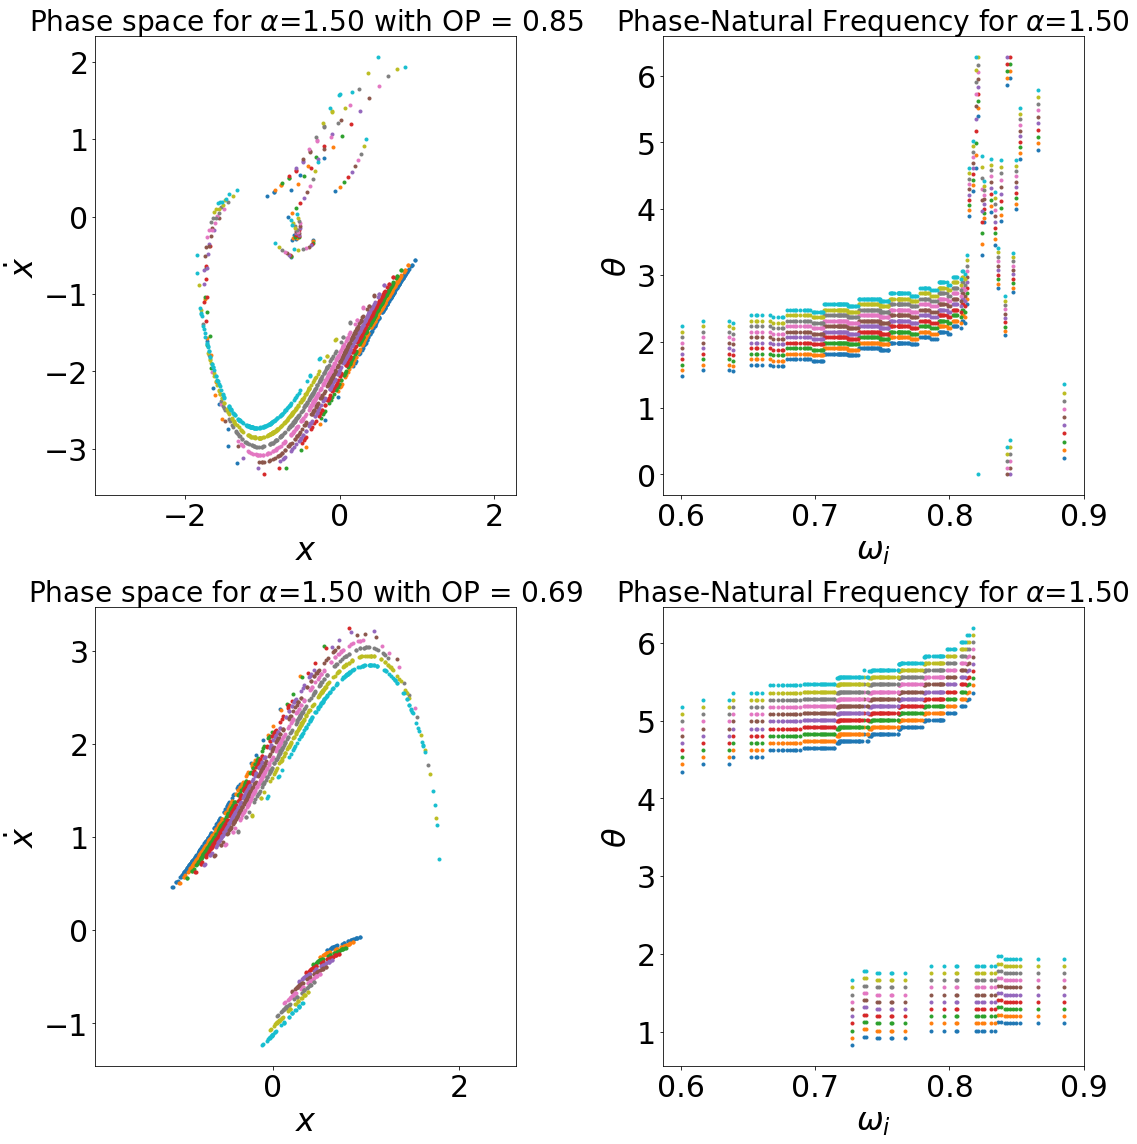

In [17]:
rcParams['figure.figsize'] = 16, 16
ticksize = 30
titelsize = 28
labelsize =32
legendsize = 20
pointsinterval = 3
alpha= alpha15
pointsnxyDecreasing = pointsnxyDecreasing15
phasesDynDecreasing = phasesDynDecreasing15
pointsnxyIncreasing = pointsnxyIncreasing15
phasesDynIncreasing = phasesDynIncreasing15


# t = -1

plt.subplot(2,2,1)
for t in np.arange(-10,0,1):
    plt.plot(pointsnxyDecreasing[t,0,::pointsinterval],pointsnxyDecreasing[t,1,::pointsinterval],'.')
plt.axis('equal')
OP, _ = order_param(phasesDynDecreasing[-10],N)
plt.title(r'Phase space for $\alpha$=%2.2f with OP = %1.2f'%(alpha,OP),fontsize=titelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)
plt.xlabel(r'$x$',fontsize=labelsize)
plt.ylabel(r'$\dot{x}$',fontsize=labelsize)

plt.subplot(2,2,2)
for t in np.arange(-10,0,1):
    plt.plot(sample[arg[::pointsinterval]],phasesDynDecreasing[t,arg[::pointsinterval]],'.')


plt.title(r'Phase-Natural Frequency for $\alpha$=%2.2f'%(alpha),fontsize=titelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)
plt.xlabel(r'$\omega_i$',fontsize=labelsize)
plt.ylabel(r'$\theta$',fontsize=labelsize)

plt.subplot(2,2,3)
for t in np.arange(-20,-10,1):
    plt.plot(pointsnxyIncreasing[t,0,::pointsinterval],pointsnxyIncreasing[t,1,::pointsinterval],'.')
plt.axis('equal')
OP, _ = order_param(phasesDynIncreasing[-20],N)
plt.title(r'Phase space for $\alpha$=%2.2f with OP = %1.2f'%(alpha,OP),fontsize=titelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)
plt.xlabel(r'$x$',fontsize=labelsize)
plt.ylabel(r'$\dot{x}$',fontsize=labelsize)

plt.subplot(2,2,4)
for t in np.arange(-20,-10,1):
    plt.plot(sample[arg[::pointsinterval]],phasesDynIncreasing[t,arg[::pointsinterval]],'.')
    
plt.title(r'Phase-Natural Frequency for $\alpha$=%2.2f'%(alpha),fontsize=titelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)
plt.xlabel(r'$\omega_i$',fontsize=labelsize)
plt.ylabel(r'$\theta$',fontsize=labelsize)
plt.tight_layout()

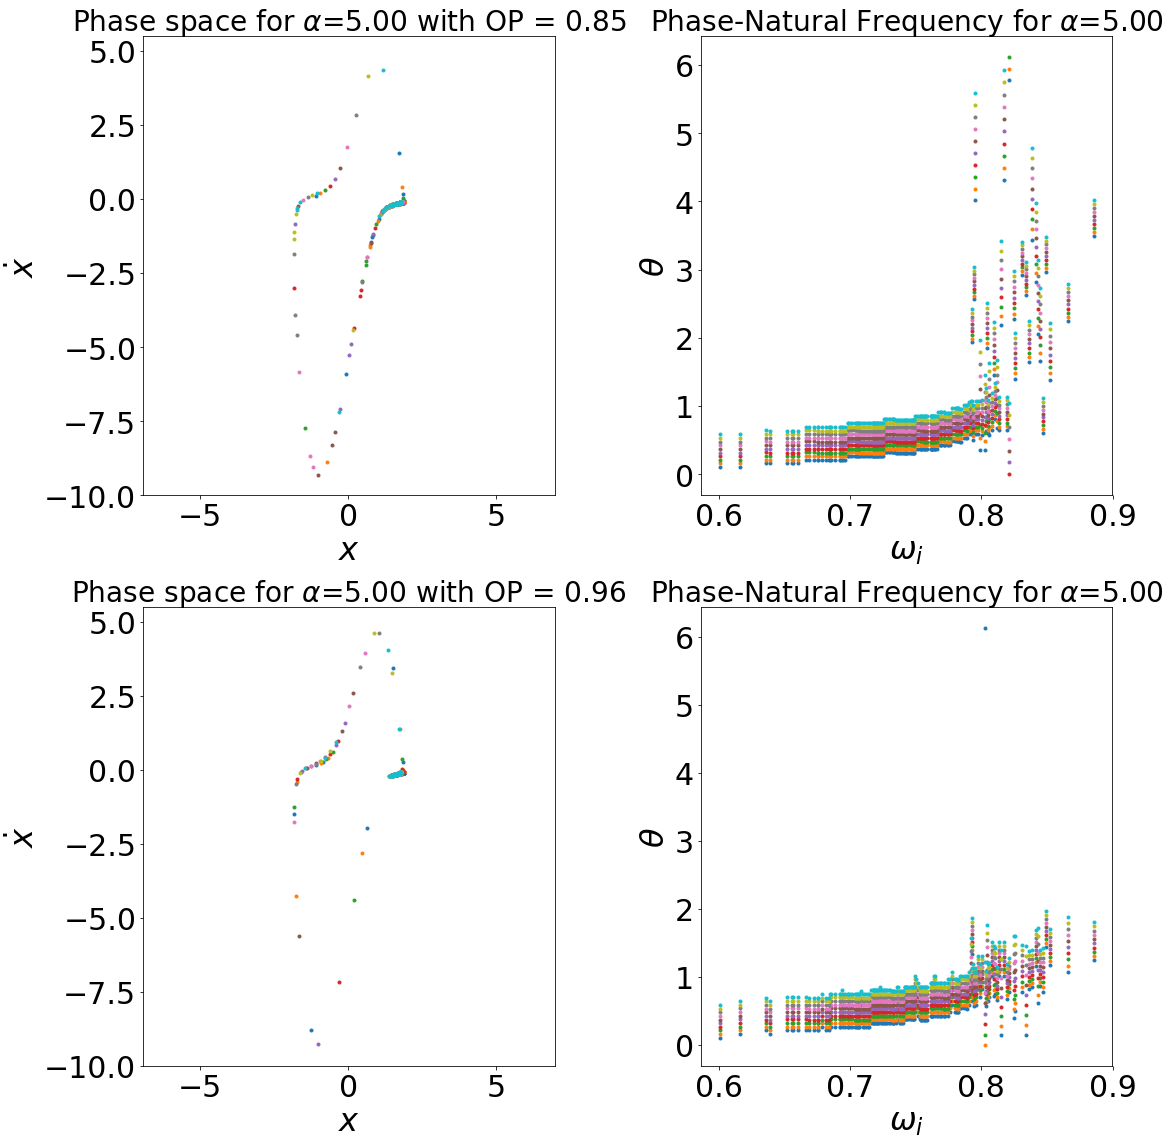

In [24]:
rcParams['figure.figsize'] = 16, 16
ticksize = 30
titelsize = 28
labelsize =32
legendsize = 20
pointsinterval = 3
alpha= alpha5
pointsnxyDecreasing = pointsnxyDecreasing5
phasesDynDecreasing = phasesDynDecreasing5
pointsnxyIncreasing = pointsnxyIncreasing5
phasesDynIncreasing = phasesDynIncreasing5


# t = -1

plt.subplot(2,2,1)
for t in np.arange(-110,-100,1):
    plt.plot(pointsnxyDecreasing[t,0,::pointsinterval],pointsnxyDecreasing[t,1,::pointsinterval],'.')
plt.axis('equal')
OP, _ = order_param(phasesDynDecreasing[-110],N)
plt.title(r'Phase space for $\alpha$=%2.2f with OP = %1.2f'%(alpha,OP),fontsize=titelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)
plt.xlabel(r'$x$',fontsize=labelsize)
plt.ylabel(r'$\dot{x}$',fontsize=labelsize)
plt.ylim([-10,5.5])

plt.subplot(2,2,2)
for t in np.arange(-110,-100,1):
    plt.plot(sample[arg[::pointsinterval]],phasesDynDecreasing[t,arg[::pointsinterval]],'.')
    
plt.title(r'Phase-Natural Frequency for $\alpha$=%2.2f'%(alpha),fontsize=titelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)
plt.xlabel(r'$\omega_i$',fontsize=labelsize)
plt.ylabel(r'$\theta$',fontsize=labelsize)

plt.subplot(2,2,3)
for t in np.arange(-10,-0,1):
    plt.plot(pointsnxyIncreasing[t,0,::pointsinterval],pointsnxyIncreasing[t,1,::pointsinterval],'.')
plt.axis('equal')
OP, _ = order_param(phasesDynIncreasing[-20],N)
plt.title(r'Phase space for $\alpha$=%2.2f with OP = %1.2f'%(alpha,OP),fontsize=titelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)
plt.xlabel(r'$x$',fontsize=labelsize)
plt.ylabel(r'$\dot{x}$',fontsize=labelsize)
plt.ylim([-10,5.5])

plt.subplot(2,2,4)
for t in np.arange(-10,0,1):
    plt.plot(sample[arg[::pointsinterval]],phasesDynIncreasing[t,arg[::pointsinterval]],'.')
    
plt.title(r'Phase-Natural Frequency for $\alpha$=%2.2f'%(alpha),fontsize=titelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)
plt.xlabel(r'$\omega_i$',fontsize=labelsize)
plt.ylabel(r'$\theta$',fontsize=labelsize)
plt.tight_layout()